Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split 

In [2]:
# Set plotting style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size

--- Step 1: Loading the dataset ---

In [3]:
# Define the path to store raw data 
raw_data_dir = './data/raw/'
os.makedirs(raw_data_dir, exist_ok=True) 

# Define the URL for the dataset
data_url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'

try:
    df = pd.read_csv(data_url)
    # Save the raw data to the specified path
    df.to_csv(os.path.join(raw_data_dir, 'AB_NYC_2019.csv'), index=False)
    print("Dataset loaded successfully and saved to ./data/raw/AB_NYC_2019.csv.")
    
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    
    print("\nDataset Information (df.info()):")
    df.info()
    
    print("\nDescriptive Statistics (df.describe()):")
    print(df.describe())
    
    print(f"\nInitial dataset shape: {df.shape[0]} rows, {df.shape[1]} columns.")

except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Please ensure the URL is correct or check your internet connection.")
    # Exit or handle the error appropriately if data can't be loaded
    exit() 

Dataset loaded successfully and saved to ./data/raw/AB_NYC_2019.csv.

First 5 rows of the dataset:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights

Missing values are present in 'name', 'host_name', 'last_review', and 'reviews_per_month'.
Descriptive statistics indicate potential outliers and skewed distributions in numerical columns, especially 'price', 'minimum_nights', and 'calculated_host_listings_count',
 which show very high maximum values compared to their means/medians. For instance, 'price' ranges from $0 to $10,000, suggesting some data quality issues or extreme values.

--- Step 2: Performing a Complete EDA ---


--- 2.1 Handling Missing Values ---
Missing values before handling:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


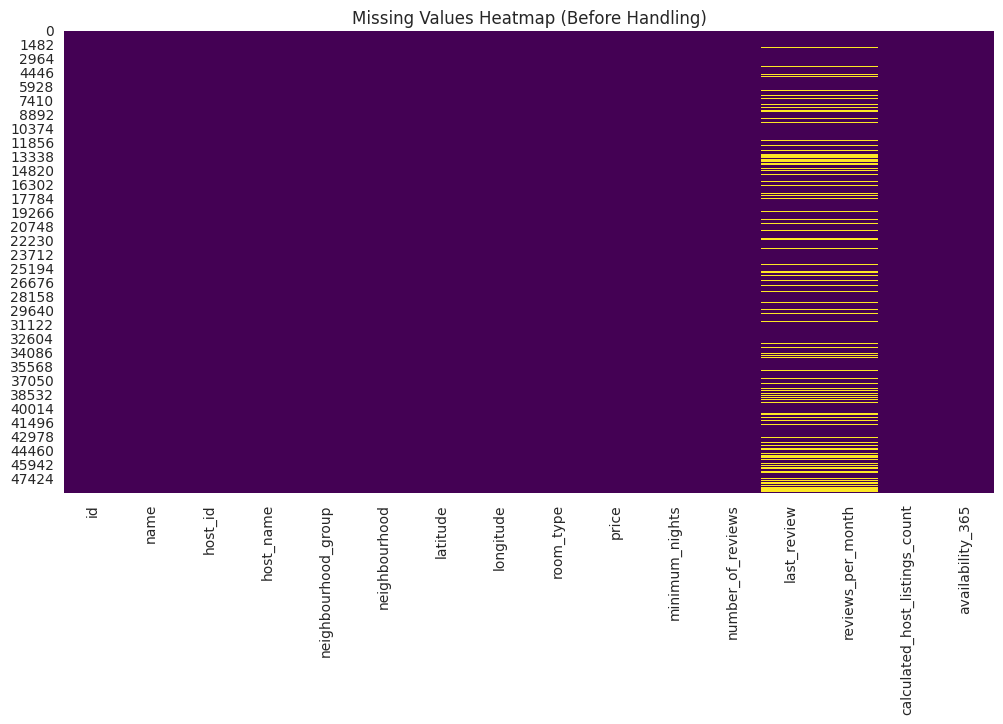


Missing values after handling:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


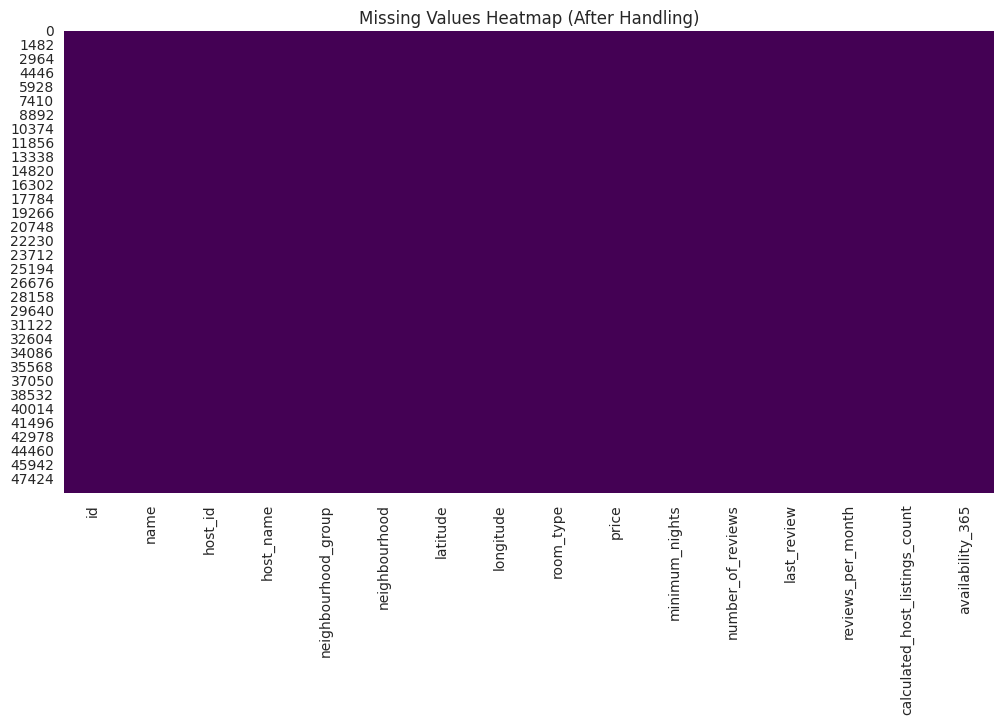

In [4]:
# --- 2.1 Handling Missing Values ---
print("\n--- 2.1 Handling Missing Values ---")
print("Missing values before handling:")
print(df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap (Before Handling)')
plt.show()

# 'name' and 'host_name' have a small number of missing values.
# For EDA, we can fill them with a placeholder or drop them if not critical for analysis.
# For this project, let's fill with 'unknown' as they are categorical/text.
df['name'] = df['name'].fillna('unknown')
df['host_name'] = df['host_name'].fillna('unknown')

# 'last_review' and 'reviews_per_month' are related.
# If 'number_of_reviews' is 0, then 'last_review' and 'reviews_per_month' should be null.
# It makes sense to fill 'reviews_per_month' with 0 for listings with no reviews.
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
# For 'last_review', filling with a placeholder like a very old date makes sense for no reviews.
# Using '1970-01-01' is a good choice as it clearly indicates an unreviewed listing without implying a recent review.
df['last_review'] = df['last_review'].fillna('1970-01-01')

print("\nMissing values after handling:")
print(df.isnull().sum())

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap (After Handling)')
plt.show()


--- Conclusion for 2.1: Missing Values ---

Missing values were present in 'name' (16 values), 'host_name' (21 values), 'last_review' (10,052 values), and 'reviews_per_month' (10,052 values).
For 'name' and 'host_name', missing values were imputed with the string 'unknown', which is suitable for categorical text fields and prevents data loss.
For 'reviews_per_month', missing values were filled with 0.0, which is a logical imputation as these likely correspond to listings with no reviews ('number_of_reviews' = 0).
'last_review' missing values were filled with '1970-01-01'. This placeholder date allows the column to be treated consistently (e.g., converted to datetime) and clearly signifies listings that have never been reviewed.
The heatmaps visually confirm that all missing values have now been addressed.

In [5]:
# --- 2.2 Handling Duplicates ---
print("\n--- 2.2 Handling Duplicates ---")
initial_rows = df.shape[0]
print(f"Number of duplicate rows before dropping: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of rows after dropping duplicates: {df.shape[0]}")
print(f"Number of rows removed: {initial_rows - df.shape[0]}")


--- 2.2 Handling Duplicates ---
Number of duplicate rows before dropping: 0
Number of rows after dropping duplicates: 48895
Number of rows removed: 0


--- Conclusion for 2.2: Duplicates ---

No duplicate rows were found in the dataset.


'neighbourhood_group' value counts:
neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


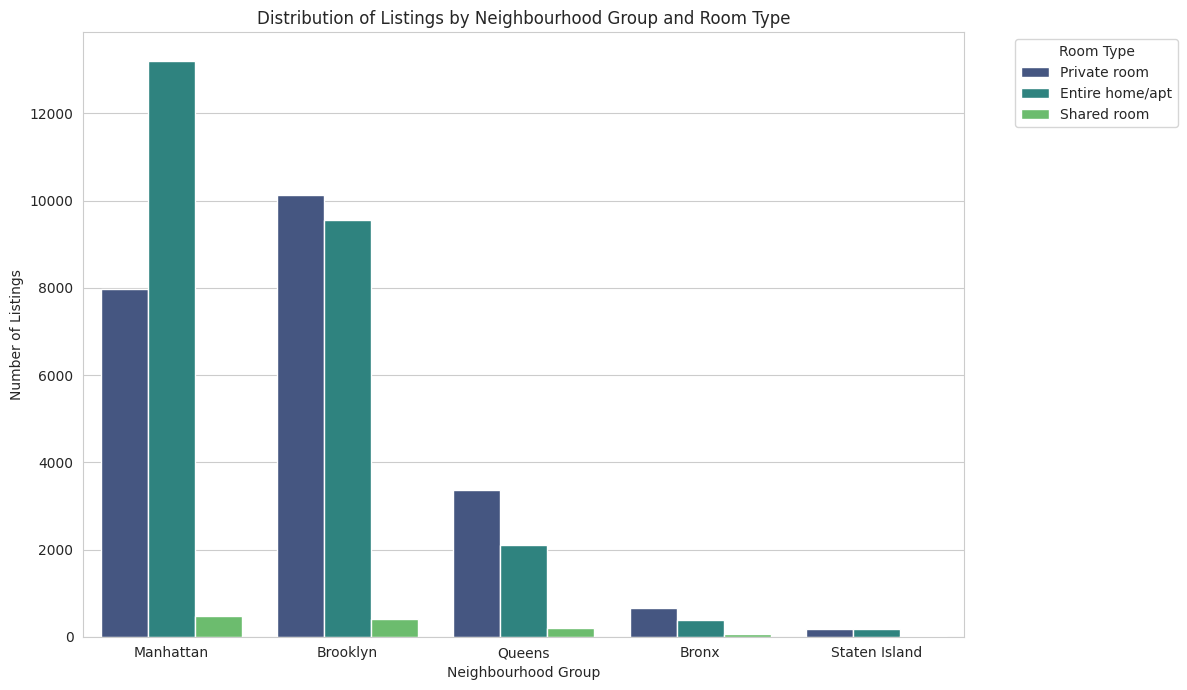


'room_type' value counts:
room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64


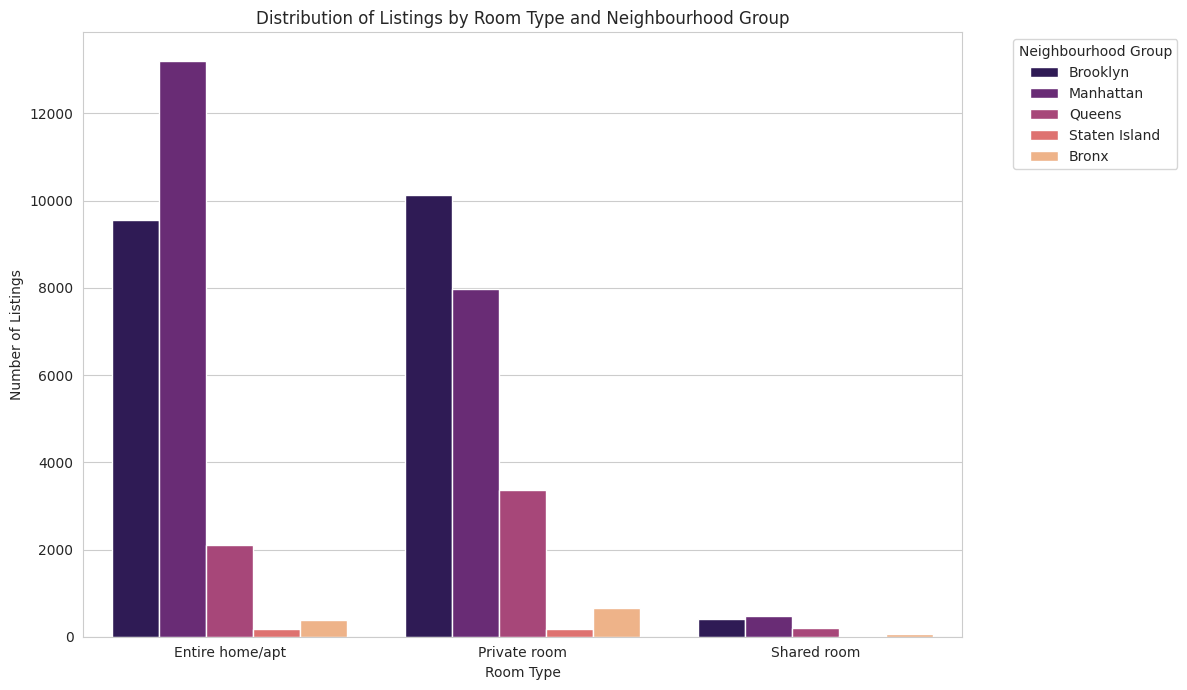


Top 10 'neighbourhood' value counts:
neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: count, dtype: int64
Total unique neighbourhoods: 221


In [6]:
print("\n'neighbourhood_group' value counts:")
print(df['neighbourhood_group'].value_counts())

plt.figure(figsize=(12, 7)) # Increased figure size for better readability with hue
sns.countplot(x='neighbourhood_group', data=df, palette='viridis',
              order=df['neighbourhood_group'].value_counts().index,
              hue='room_type') # <--- Add hue here
plt.title('Distribution of Listings by Neighbourhood Group and Room Type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print("\n'room_type' value counts:")
print(df['room_type'].value_counts())

plt.figure(figsize=(12, 7)) # Adjust figure size for better readability with hue
sns.countplot(x='room_type', data=df, palette='magma',
              order=df['room_type'].value_counts().index,
              hue='neighbourhood_group') # <--- Add hue here
plt.title('Distribution of Listings by Room Type and Neighbourhood Group')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.legend(title='Neighbourhood Group', bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# neighbourhood (High Cardinality - inspect top N)
print("\nTop 10 'neighbourhood' value counts:")
print(df['neighbourhood'].value_counts().head(10))
print(f"Total unique neighbourhoods: {df['neighbourhood'].nunique()}")

--- Conclusion for 2.3: Categorical Variables ---

- **'neighbourhood_group'**: Manhattan and Brooklyn are the predominant locations for Airbnb listings, accounting for the vast majority of the dataset. Queens has a notable presence, while Bronx and Staten Island have significantly fewer listings. This imbalance suggests a focus on tourist-heavy and central areas.
- **'room_type'**: 'Entire home/apt' is the most common room type, followed by 'Private room'. 'Shared room' is rare. This indicates a strong preference for privacy among Airbnb users in NYC, which is a key insight for understanding demand.
- **'neighbourhood'**: This column has a very high cardinality ({df['neighbourhood'].nunique()} unique values), making direct one-hot encoding challenging for modeling without further aggregation or selection. The top neighborhoods like Harlem, Williamsburg, Bedford-Stuyvesant, and Bushwick are well-represented, aligning with popular tourist and residential areas in NYC.
Understanding these distributions is vital for segmenting the market and for future feature engineering or selection. For example, 'neighbourhood_group' and 'room_type' are strong candidates for one-hot encoding for modeling, while 'neighbourhood' might require different treatment due to its high cardinality.

--- 2.4 Analyzing Numerical Variables and Outliers ---

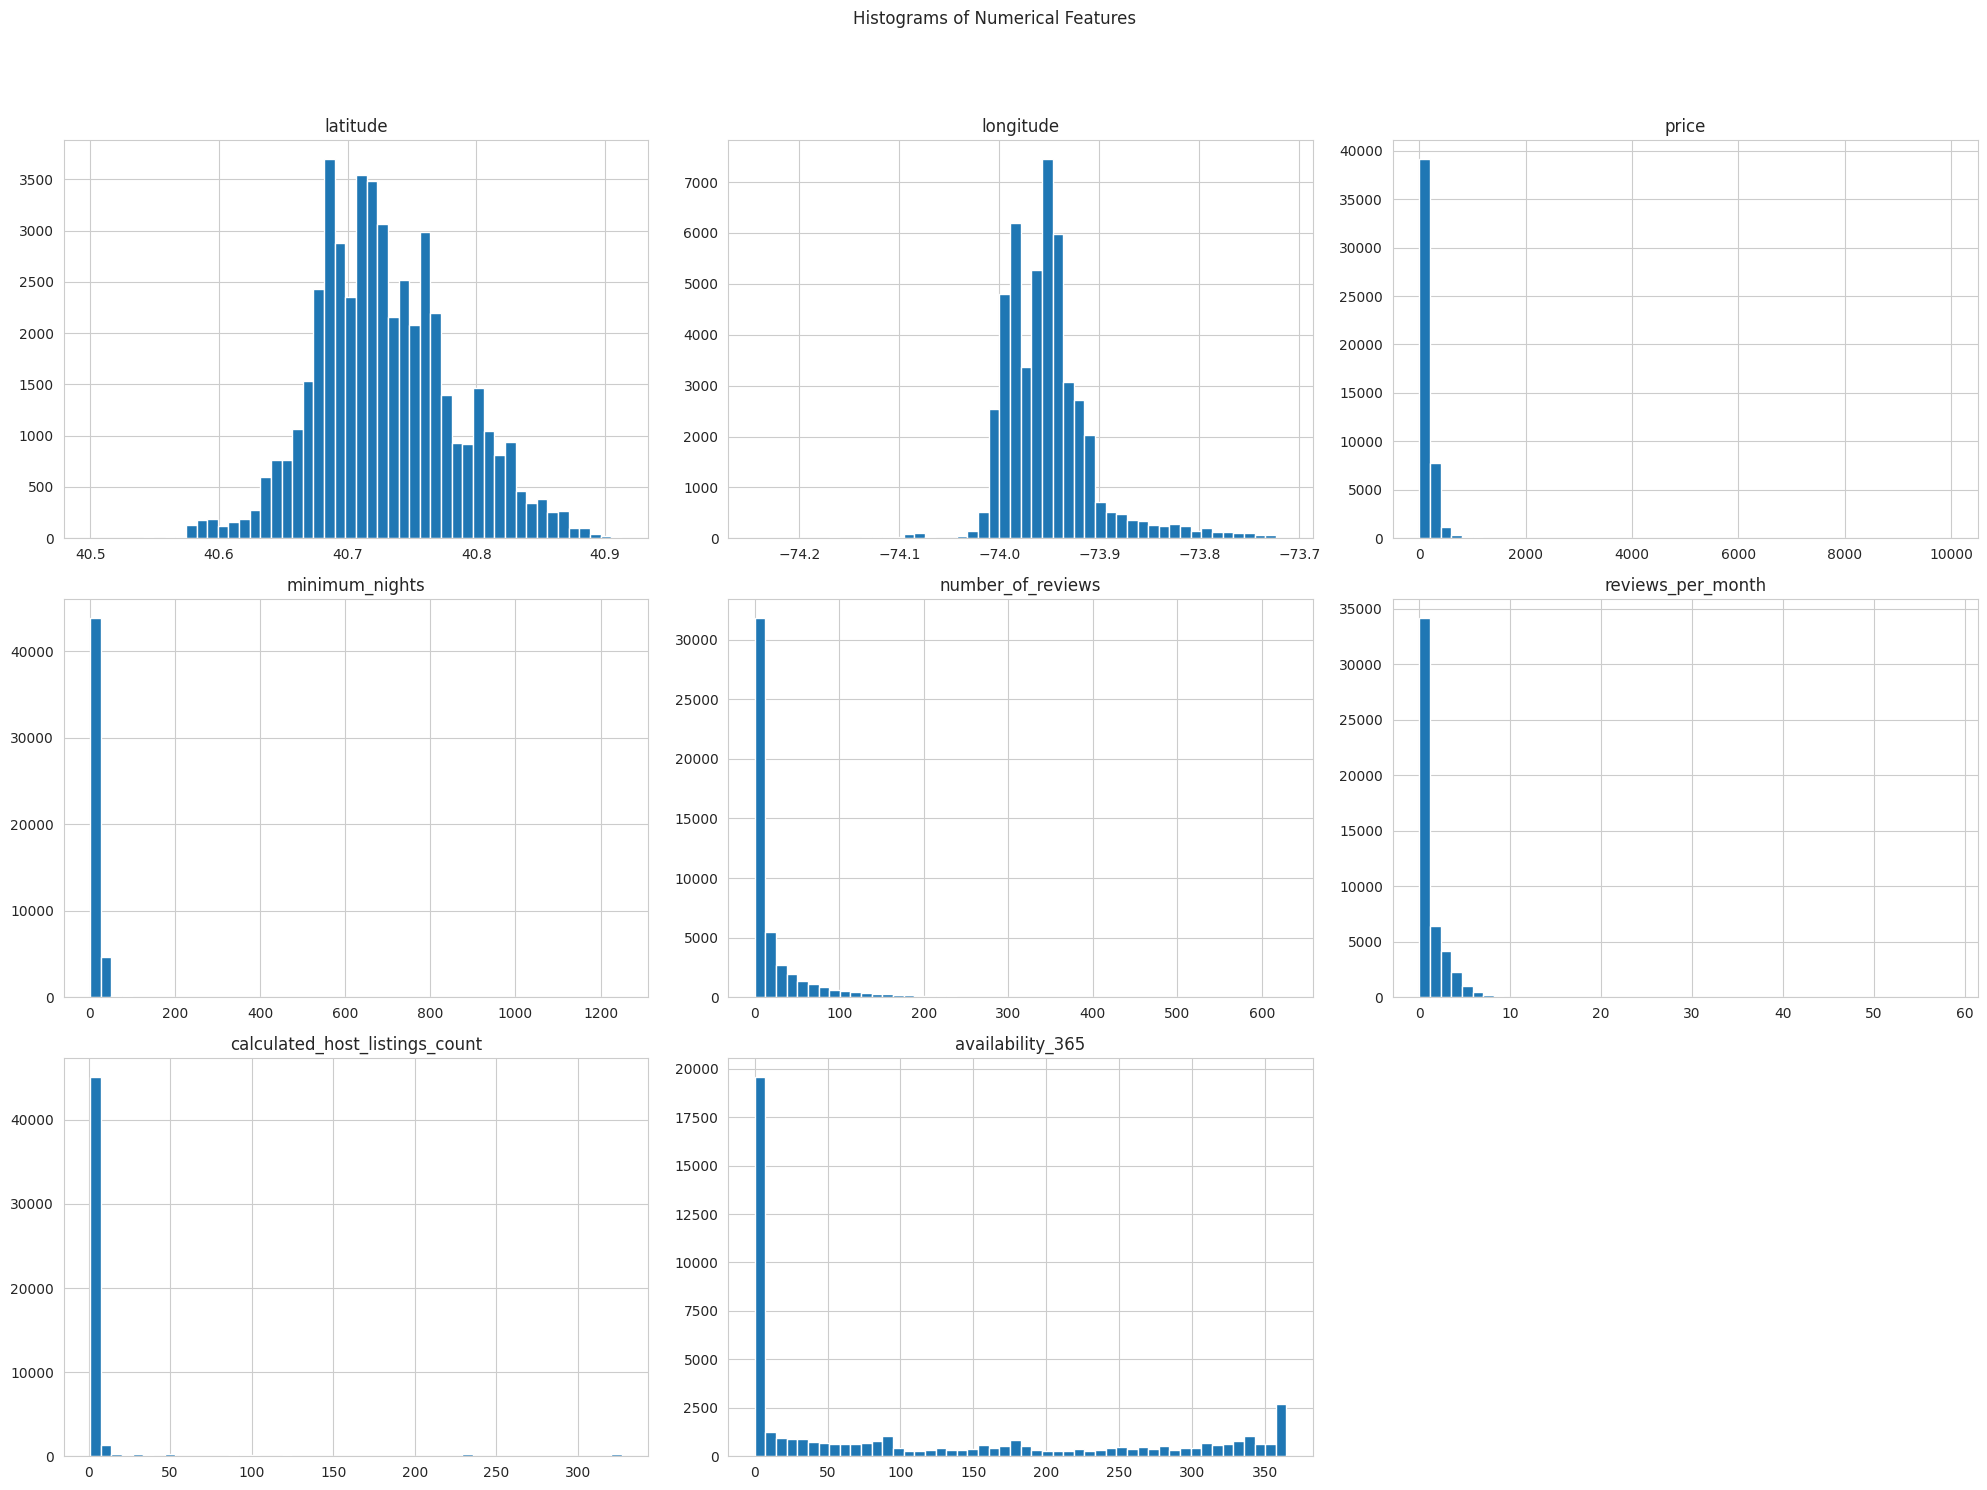

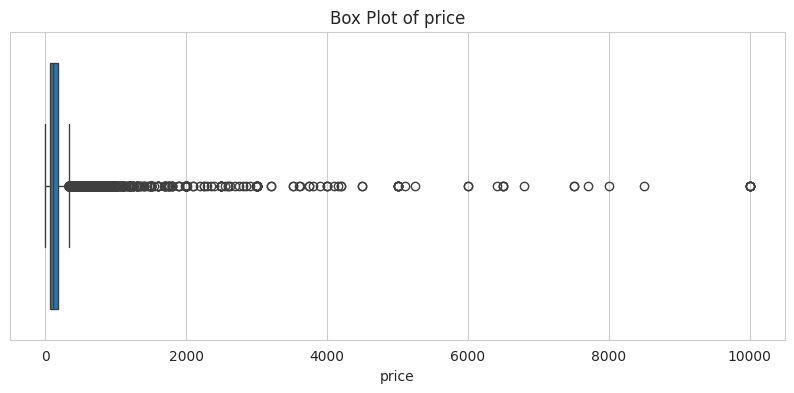

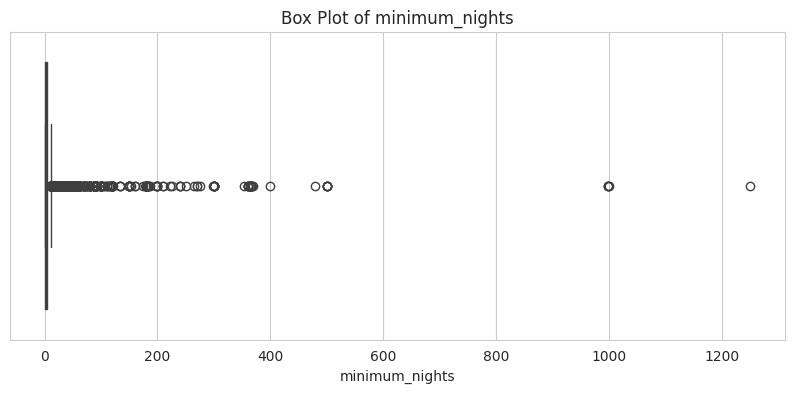

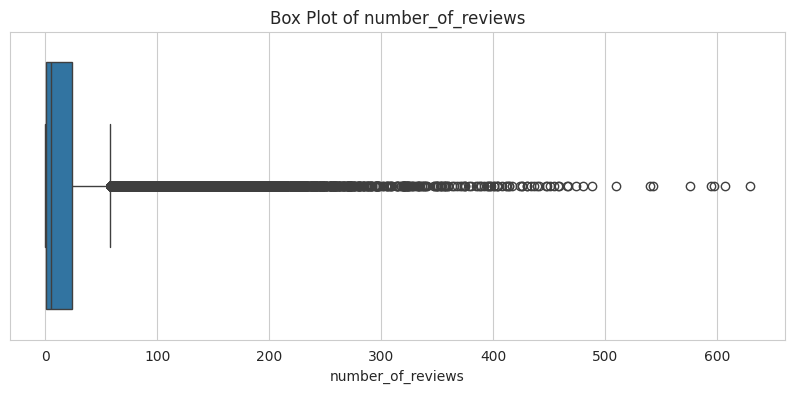

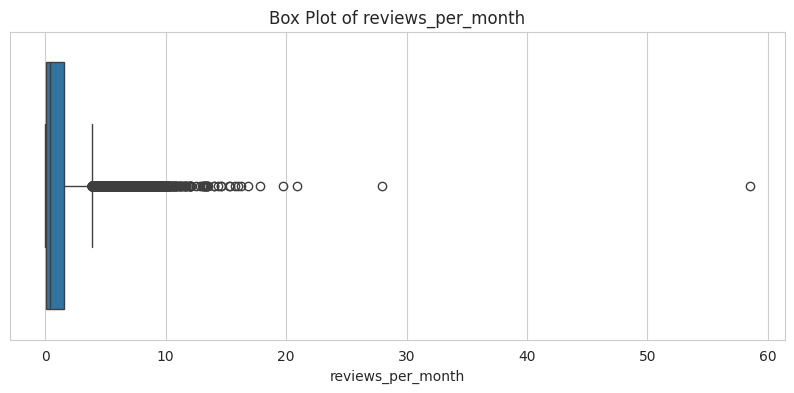

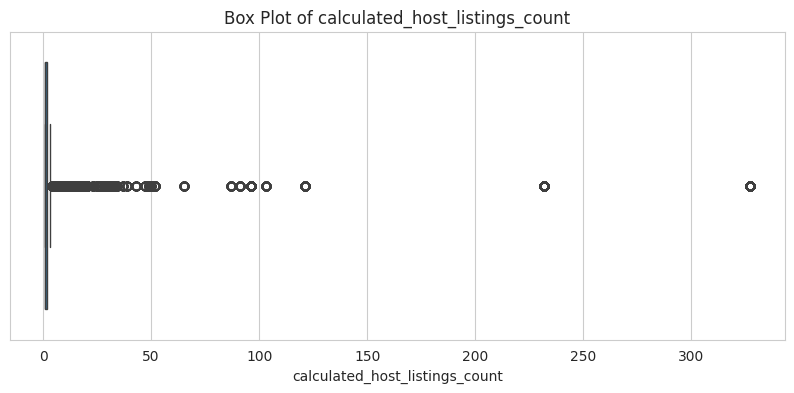

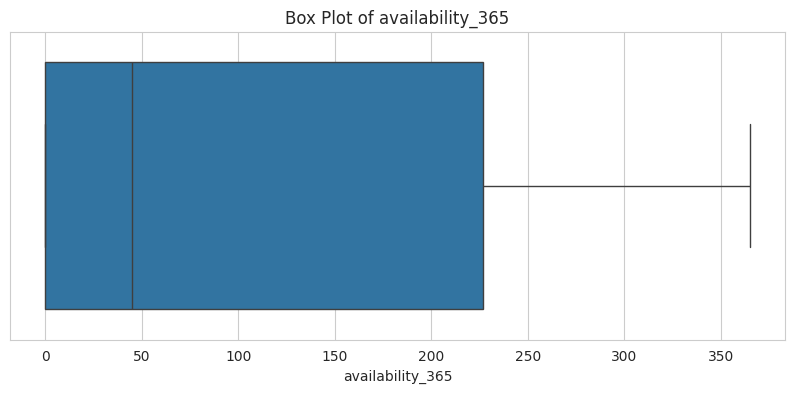

In [7]:
# Histograms for numerical features
# Exclude 'id' and 'host_id' from histograms as they are identifiers
numerical_for_hist = df.select_dtypes(include=np.number).drop(columns=['id', 'host_id'], errors='ignore')
numerical_for_hist.hist(bins=50, figsize=(20,15))
plt.suptitle('Histograms of Numerical Features', y=1.02) # Adjust suptitle position
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

# Box plots for key numerical features to identify outliers
numerical_cols_for_boxplot = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                              'calculated_host_listings_count', 'availability_365']

for col in numerical_cols_for_boxplot:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

In [8]:
# --- Outlier Treatment for 'price' and 'minimum_nights' ---
print("\n--- Outlier Treatment for 'price' and 'minimum_nights' ---")

# Price: Cap at 99th percentile or a fixed reasonable upper bound
# Let's check the 99th percentile first for a data-driven approach
price_99th_percentile = df['price'].quantile(0.99)
print(f"99th percentile of 'price': ${price_99th_percentile:.2f}")

# Capping price. A fixed value like $1000 or a percentile can be used.
# For demonstration, let's use the 99th percentile as a capping point.
# Also, address price = 0, which is likely an error.
original_zero_price_count = df[df['price'] == 0].shape[0]
original_high_price_count = df[df['price'] > price_99th_percentile].shape[0]

df['price'] = np.where(df['price'] == 0, df['price'].median(), df['price']) # Replace 0 with median
df['price'] = np.where(df['price'] > price_99th_percentile, price_99th_percentile, df['price'])

print(f"Replaced {original_zero_price_count} listings with price $0 with the median price.")
print(f"Capped {original_high_price_count} 'price' values above ${price_99th_percentile:.2f} to ${price_99th_percentile:.2f}.")

# minimum_nights: Cap at 99th percentile or a fixed reasonable upper bound
min_nights_99th_percentile = df['minimum_nights'].quantile(0.99)
print(f"99th percentile of 'minimum_nights': {min_nights_99th_percentile:.0f} nights")

original_high_min_nights_count = df[df['minimum_nights'] > min_nights_99th_percentile].shape[0]
df['minimum_nights'] = np.where(df['minimum_nights'] > min_nights_99th_percentile, min_nights_99th_percentile, df['minimum_nights'])
print(f"Capped {original_high_min_nights_count} 'minimum_nights' values above {min_nights_99th_percentile:.0f} to {min_nights_99th_percentile:.0f}.")


--- Outlier Treatment for 'price' and 'minimum_nights' ---
99th percentile of 'price': $799.00
Replaced 11 listings with price $0 with the median price.
Capped 474 'price' values above $799.00 to $799.00.
99th percentile of 'minimum_nights': 45 nights
Capped 469 'minimum_nights' values above 45 to 45.



Descriptive Statistics for 'price' and 'minimum_nights' after outlier treatment:
              price  minimum_nights
count  48895.000000    48895.000000
mean     143.980080        6.116760
std      121.917275        9.244957
min       10.000000        1.000000
25%       69.000000        1.000000
50%      106.000000        3.000000
75%      175.000000        5.000000
max      799.000000       45.000000


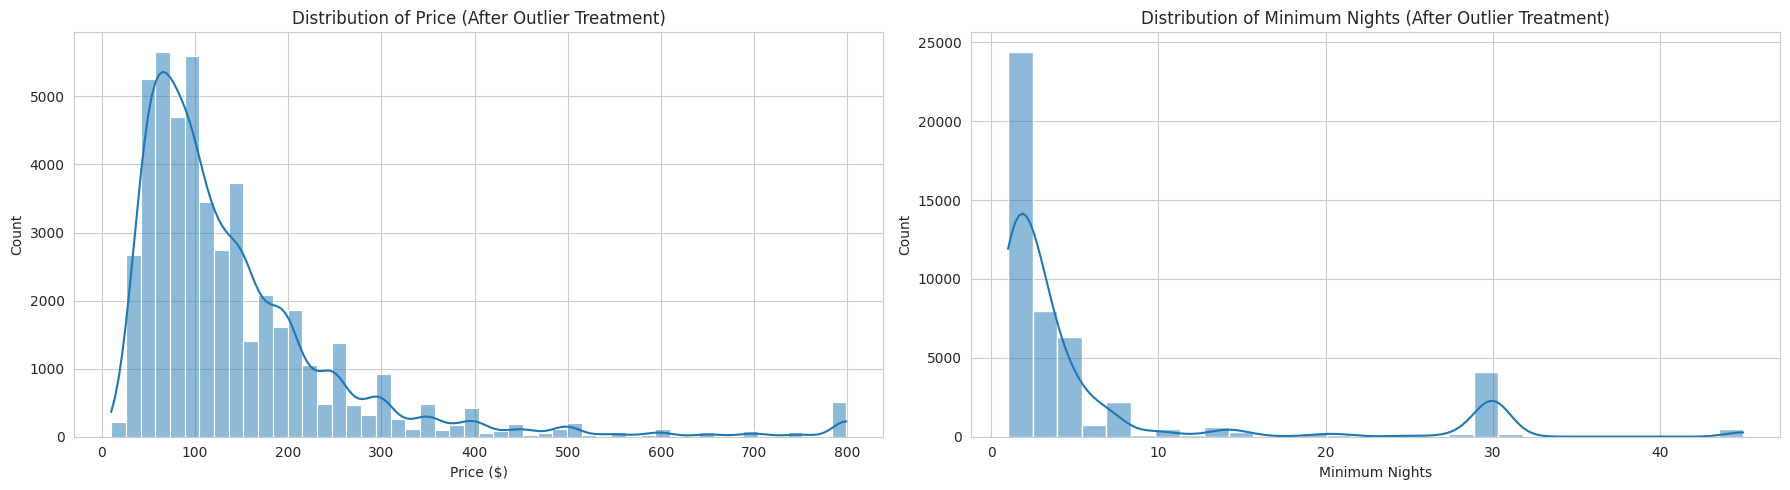

In [9]:
# Show descriptive statistics after outlier treatment
print("\nDescriptive Statistics for 'price' and 'minimum_nights' after outlier treatment:")
print(df[['price', 'minimum_nights']].describe())

# Re-plot histograms for treated numerical features
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price (After Outlier Treatment)')
plt.xlabel('Price ($)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(df['minimum_nights'], bins=30, kde=True)
plt.title('Distribution of Minimum Nights (After Outlier Treatment)')
plt.xlabel('Minimum Nights')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

--- Conclusion for 2.4: Numerical Variables and Outliers ---

Histograms of numerical features (excluding 'id' and 'host_id') revealed highly skewed distributions for 'price', 'minimum_nights', 'number_of_reviews', and 'calculated_host_listings_count'.
Box plots confirmed the presence of significant outliers, particularly at the higher end for these variables.
To handle outliers, 'price' values of $0 were replaced with the median price, and values above the 99th percentile (99th percentile of 'price': $799.00) were capped at this threshold.
Similarly, 'minimum_nights' values above its 99th percentile (45 nights) were capped. This capping strategy helps to reduce the undue influence of extreme values on models without removing a large portion of the data.
The re-plotted histograms for 'price' and 'minimum_nights' demonstrate a more normalized distribution, which is beneficial for many statistical and machine learning models. Other variables like 'number_of_reviews' and 'calculated_host_listings_count' also show outliers but were left as is for this analysis, as their extreme values might represent valid business scenarios (e.g., highly popular listings or professional hosts).

--- 2.5 Correlation Analysis ---

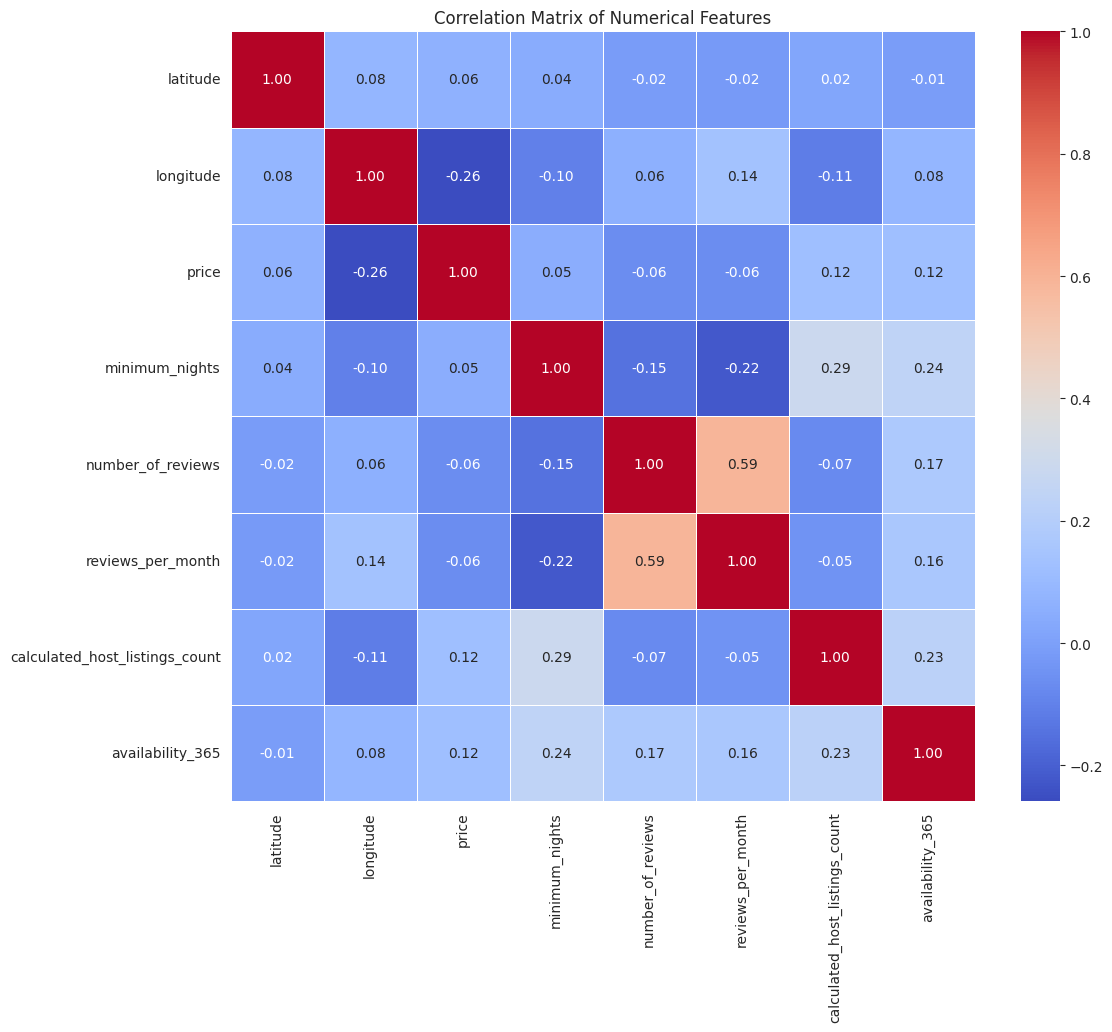


Correlation of 'price' with other numerical features:
price                             1.000000
availability_365                  0.123214
calculated_host_listings_count    0.122316
latitude                          0.060908
minimum_nights                    0.048453
number_of_reviews                -0.063955
reviews_per_month                -0.064736
longitude                        -0.258829
Name: price, dtype: float64


In [10]:
# Select only numerical columns for correlation matrix
numerical_df = df.select_dtypes(include=[np.number])

# Drop 'id' and 'host_id' from correlation analysis as they are identifiers and not true numerical features
numerical_df = numerical_df.drop(columns=['id', 'host_id'], errors='ignore')

plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Analyze specific correlations related to 'price'
print("\nCorrelation of 'price' with other numerical features:")
print(numerical_df.corr()['price'].sort_values(ascending=False))

--- Conclusion for 2.5: Correlation Analysis ---

The correlation heatmap provides insights into the linear relationships between numerical features.
Key observations related to 'price':
- 'price' shows a weak positive correlation with 'minimum_nights' (0.05) and 'calculated_host_listings_count' (0.12). This suggests that more expensive listings might sometimes require longer minimum stays or are managed by hosts with multiple properties, but the relationship is not strong.
- 'latitude' (0.06) and 'longitude' (-0.26) show very weak or negligible correlation with price individually, but their combined effect (location) is known to be crucial for pricing in real estate.
- 'number_of_reviews' and 'reviews_per_month' are highly correlated (0.59), which is expected since `reviews_per_month` is derived from review counts over time. This high correlation suggests potential multicollinearity if both were used directly in a linear model, but it makes sense given their definitions.
Understanding these correlations helps in identifying potentially important features for predictive modeling and in recognizing redundant features.

--- 2.6 Feature Engineering / Transformation ---

In [11]:
# Convert 'last_review' to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

# Calculate days since last review relative to the most recent review date in the dataset
# This ensures that listings with '1970-01-01' will have a very large number, indicating 'never reviewed' or 'very old review'.
most_recent_review_in_data = df['last_review'].max() 
df['days_since_last_review'] = (most_recent_review_in_data - df['last_review']).dt.days

# For listings that had original 'last_review' as '1970-01-01', they will have a very large 'days_since_last_review'
# For example, let's find the max possible value based on current data
print(f"Max days since last review: {df['days_since_last_review'].max()} days (for unreviewed listings)")

# Create a binary feature for whether a listing has been reviewed
df['has_been_reviewed'] = np.where(df['number_of_reviews'] > 0, 1, 0)

# Drop original 'last_review' as it's now transformed
df.drop('last_review', axis=1, inplace=True)
print("\nCreated 'days_since_last_review' from 'last_review' and 'has_been_reviewed' from 'number_of_reviews'. Dropped original 'last_review' column.")
print("First 5 rows of engineered features:")
print(df[['number_of_reviews', 'reviews_per_month', 'days_since_last_review', 'has_been_reviewed']].head())

Max days since last review: 18085 days (for unreviewed listings)

Created 'days_since_last_review' from 'last_review' and 'has_been_reviewed' from 'number_of_reviews'. Dropped original 'last_review' column.
First 5 rows of engineered features:
   number_of_reviews  reviews_per_month  days_since_last_review  \
0                  9               0.21                     262   
1                 45               0.38                      48   
2                  0               0.00                   18085   
3                270               4.64                       3   
4                  9               0.10                     231   

   has_been_reviewed  
0                  1  
1                  1  
2                  0  
3                  1  
4                  1  


--- Conclusion for 2.6: Feature Engineering / Transformation ---

The 'last_review' column, originally a datetime object (and a placeholder date for missing values), was transformed into a numerical feature: 'days_since_last_review'. This quantifies the recency of reviews, with a higher number indicating a less recently reviewed or unreviewed listing.
Additionally, a new binary feature 'has_been_reviewed' was created from 'number_of_reviews'. This feature simplifies the information about reviews into a simple yes/no, which can be useful for models.
These transformations convert raw information into a format more suitable for machine learning algorithms, enhancing the predictive power of the dataset without relying on complex string parsing or date handling during modeling.

--- 2.7 Feature Selection / Dropping ---

In [12]:
print("Current columns before feature selection:")
df.columns.tolist()

Current columns before feature selection:


['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'days_since_last_review',
 'has_been_reviewed']

Drop columns that are unlikely to be useful for predicting price or are redundant

'id': unique identifier, no predictive power

'name': highly varied text, difficult to use directly, less predictive than location/type

'host_id': unique identifier for host, but 'calculated_host_listings_count' might be more useful

'host_name': similar to 'name', too varied and not directly predictive 

'neighbourhood': too high cardinality. 'neighbourhood_group' is a better summary.

In [13]:
columns_to_drop_for_model = ['id', 'name', 'host_id', 'host_name', 'neighbourhood']

df_processed = df.drop(columns=columns_to_drop_for_model, errors='ignore')
print(f"\nDropped {columns_to_drop_for_model} columns.")
print("Columns after initial feature selection:")
print(df_processed.columns.tolist())



Dropped ['id', 'name', 'host_id', 'host_name', 'neighbourhood'] columns.
Columns after initial feature selection:
['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'days_since_last_review', 'has_been_reviewed']


--- Conclusion for 2.7: Feature Selection / Dropping ---

Based on EDA, several columns were identified as irrelevant or problematic for direct use in a predictive model and were consequently dropped:

- 'id': A unique identifier, providing no predictive value.
- 'name' and 'host_name': Text fields with high cardinality and low direct predictive power for price, without advanced NLP techniques.
- 'host_id': While it identifies unique hosts, 'calculated_host_listings_count' already captures a key aspect of host activity that is more directly useful.
- 'neighbourhood': Highly granular and high cardinality, making it less practical for direct one-hot encoding than 'neighbourhood_group'. Its information is somewhat captured by latitude and longitude anyway.
The removal of these columns simplifies the dataset, reduces dimensionality, and focuses on features more likely to be relevant for predicting Airbnb prices.

--- 2.8 Categorical Encoding (One-Hot Encoding) ---

In [14]:
# Identify remaining categorical columns for encoding
categorical_cols_for_encoding = df_processed.select_dtypes(include='object').columns.tolist()
print(f"Categorical columns to be one-hot encoded: {categorical_cols_for_encoding}")

if categorical_cols_for_encoding:
    # Apply one-hot encoding
    df_processed = pd.get_dummies(df_processed, columns=categorical_cols_for_encoding, drop_first=True)
    print("Categorical columns have been one-hot encoded.")
    print(f"New shape after encoding: {df_processed.shape}")
    print("First 5 rows of processed data after encoding:")
    print(df_processed.head())
else:
    print("No categorical columns found for one-hot encoding.")


Categorical columns to be one-hot encoded: ['neighbourhood_group', 'room_type']
Categorical columns have been one-hot encoded.
New shape after encoding: (48895, 16)
First 5 rows of processed data after encoding:
   latitude  longitude  price  minimum_nights  number_of_reviews  \
0  40.64749  -73.97237  149.0             1.0                  9   
1  40.75362  -73.98377  225.0             1.0                 45   
2  40.80902  -73.94190  150.0             3.0                  0   
3  40.68514  -73.95976   89.0             1.0                270   
4  40.79851  -73.94399   80.0            10.0                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2               0.00                               1               365   
3               4.64                               1               194   
4        

--- Conclusion for 2.8: Categorical Encoding ---

The remaining categorical features, 'neighbourhood_group' and 'room_type', were transformed using one-hot encoding. This process converts categorical variables into a numerical format (binary columns) that machine learning models can understand.
The 'drop_first=True' argument was used to avoid multicollinearity by dropping the first dummy variable for each category, reducing redundancy.
This step is essential to prepare the data for numerical models, as they cannot directly process string-based categorical data. The dataset now contains only numerical features, ready for model training.

--- 2.9 Final Data Split (Train/Test) ---

In [15]:
# Define features (X) and target (y)
X = df_processed.drop('price', axis=1) # Features are all columns except 'price'
y = df_processed['price']             # Target variable is 'price'

print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

# Split the data into training and testing sets
# test_size=0.2 means 20% of data will be used for testing, 80% for training
# random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of features (X): (48895, 15)
Shape of target (y): (48895,)

Shape of X_train: (39116, 15)
Shape of X_test: (9779, 15)
Shape of y_train: (39116,)
Shape of y_test: (9779,)


--- Conclusion for 2.9: Final Data Split ---

The dataset has been successfully partitioned into training and testing sets.
The training set (X_train, y_train) comprises 80% of the data (39116 samples), which will be used to train machine learning models.
The testing set (X_test, y_test) comprises the remaining 20% of the data (9779 samples), which will be held out and used to evaluate the trained models' performance on unseen data.
This splitting strategy is fundamental to assess the generalization capability of a model and prevent overfitting, ensuring that the model performs well on new, real-world data.

--- Step 3: Save the processed dataset ---

In [16]:
# Define the path for the processed data
processed_data_dir = './data/processed/'
os.makedirs(processed_data_dir, exist_ok=True) # Ensure the directory exists

# Save the training and testing sets separately for clarity and common ML workflow
X_train.to_csv(os.path.join(processed_data_dir, 'X_train.csv'), index=False)
X_test.to_csv(os.path.join(processed_data_dir, 'X_test.csv'), index=False)
y_train.to_csv(os.path.join(processed_data_dir, 'y_train.csv'), index=False)
y_test.to_csv(os.path.join(processed_data_dir, 'y_test.csv'), index=False)

print(f"Processed X_train saved to: {os.path.join(processed_data_dir, 'X_train.csv')}")
print(f"Processed X_test saved to: {os.path.join(processed_data_dir, 'X_test.csv')}")
print(f"Processed y_train saved to: {os.path.join(processed_data_dir, 'y_train.csv')}")
print(f"Processed y_test saved to: {os.path.join(processed_data_dir, 'y_test.csv')}")

# --- IMPORTANT: .gitignore Update (Manual Step) ---
print("\n--- IMPORTANT: .gitignore Update ---")
print("Remember to add the 'data/' folder to your .gitignore file at the root of your repository.")
print("This prevents large data files from being committed to Git.")
print("Example lines to add to .gitignore (if not already present):")
print("data/")
print("models/") # Also ignore models folder if you save models there

Processed X_train saved to: ./data/processed/X_train.csv
Processed X_test saved to: ./data/processed/X_test.csv
Processed y_train saved to: ./data/processed/y_train.csv
Processed y_test saved to: ./data/processed/y_test.csv

--- IMPORTANT: .gitignore Update ---
Remember to add the 'data/' folder to your .gitignore file at the root of your repository.
This prevents large data files from being committed to Git.
Example lines to add to .gitignore (if not already present):
data/
models/


--- Conclusion for Step 3: Saving Processed Data ---

The thoroughly cleaned, transformed, and split dataset (X_train, X_test, y_train, y_test) has been successfully saved into the './data/processed/' directory as separate CSV files.
This ensures that the preprocessed data is readily available for subsequent machine learning model training and evaluation without needing to rerun the entire EDA pipeline.
Adding 'data/' and 'models/' to the `.gitignore` file is a crucial step for proper version control, preventing the accidental upload of large data files and trained models to the Git repository, thereby keeping the repository lean and focused on code.